In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [17]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [29]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 添加BatchNormalization 批均一化，其实是对每一次的训练集都进行规范化
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(0.001),
             metrics=['accuracy'])

# model.summary()

In [34]:
logdir = './dnn-bn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

history = model.fit(x_train_scaled, y_train, epochs=50,
                   validation_data=(x_valid_scaled, y_valid),
                   callbacks=callbacks)

Epoch 1/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4232 - accuracy: 0.8520 - val_loss: 0.3602 - val_accuracy: 0.8746
Epoch 2/50
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4160 - accuracy: 0.8547 - val_loss: 0.3613 - val_accuracy: 0.8760
Epoch 3/50
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4073 - accuracy: 0.8595 - val_loss: 0.3540 - val_accuracy: 0.8782
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3938 - accuracy: 0.8628 - val_loss: 0.3546 - val_accuracy: 0.8720
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3867 - accuracy: 0.8656 - val_loss: 0.3448 - val_accuracy: 0.8798
Epoch 6/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3805 - accuracy: 0.8663 - val_loss: 0.3529 - val_accuracy: 0.8754
Epoch 7/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3716 - accuracy: 0.8704 - val_loss: 0.3336 - val_ac

In [31]:
# history.history

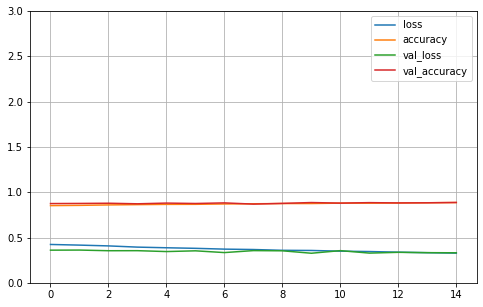

In [35]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

In [36]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8737: 0s - loss: 0.3754 - ac


[0.3624162971973419, 0.8737000226974487]